In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
import os
PATH="/home/pl/Documents/course_work_1/"
print(os.listdir(PATH))

['y_test_under.csv', 'previous_application.csv', 'План рассказа.doc', 'Курсовая работа Легушева.docx', 'bureau_balance.csv', 'X_test_over.csv', 'installments_payments.csv', 'index.jpeg', 'Курсовая работа 2 курс.pptx', 'Задание_на_курсовую_работу,_курсовой_проект (2).docx', 'X_train_over.csv', 'X_train_under.csv', 'application_train.csv', 'Курсовая работа 2 курс.pdf', 'y_train_under.csv', 'y_test_over.csv', 'POS_CASH_balance.csv', 'application_test.csv', 'sample_submission.csv', 'G1hb1IPhoQQ.jpg', 'y_train_over.csv', 'Курсовая работа Легушева.pdf', 'bureau.csv', '.ipynb_checkpoints', 'HomeCredit_columns_description.csv', 'X_test_under.csv', 'credit_card_balance.csv']


# Data load

In [3]:
app_train = pd.read_csv(PATH + 'application_train.csv',)
app_test = pd.read_csv(PATH + 'application_test.csv',)
pd.set_option('display.max_columns', None)
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

# Full Dataset

In [4]:
app_train_full = app_train
app_train_full.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
app_train_full.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [6]:
app_train_full.isna().sum()/len(app_train_full)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

In [7]:
numeric = app_train_full.select_dtypes(include=np.number)
numeric_columns = numeric.columns

In [8]:
for col in numeric_columns: 
     app_train_full[col] = app_train_full[col].fillna(numeric.mean())

In [9]:
app_train_full['DAYS_LAST_PHONE_CHANGE'].isna().sum()/len(app_train_full)*100

0.00032519161916159093

In [10]:
app_train_full.dropna(subset=['DAYS_LAST_PHONE_CHANGE'], axis = 0, inplace = True)

In [11]:
app_train_full['AMT_GOODS_PRICE'].isna().sum()/len(app_train_full)*100

0.09040356411173621

In [12]:
app_train_full['AMT_ANNUITY'].isna().sum()/len(app_train_full)*100

0.0039023121199310592

In [13]:
app_train_full.dropna(subset=['AMT_GOODS_PRICE'], axis = 0, inplace = True)

In [14]:
app_train_full['AMT_GOODS_PRICE'].isna().sum()/len(app_train_full)*100

0.0

In [15]:
app_train_full.dropna(subset=['AMT_ANNUITY'], axis = 0, inplace = True)

In [16]:
app_train_full['AMT_ANNUITY'].isna().sum()/len(app_train_full)*100

0.0

In [17]:
app_train_full.dropna(axis=1, inplace = True)

In [18]:
app_train_full.isnull().sum().sum()

0

## Test

In [19]:
app_test.isnull().sum().sum()

1404419

In [20]:
app_test.isna().sum()/len(app_test)*100

SK_ID_CURR                     0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     12.409732
AMT_REQ_CREDIT_BUREAU_WEEK    12.409732
AMT_REQ_CREDIT_BUREAU_MON     12.409732
AMT_REQ_CREDIT_BUREAU_QRT     12.409732
AMT_REQ_CREDIT_BUREAU_YEAR    12.409732
Length: 121, dtype: float64

In [21]:
numeric_test = app_test.select_dtypes(include=np.number)
numeric_test_columns = numeric_test.columns

In [22]:
for col in numeric_test_columns: 
     app_test[col] = app_test[col].fillna(numeric_test.mean())

In [23]:
numeric_test.isnull().sum().sum()

1285385

In [24]:
app_test['DAYS_LAST_PHONE_CHANGE'].isna().sum()/len(app_test)*100

0.0

In [25]:
app_test['AMT_ANNUITY'].isna().sum()/len(app_test)*100

0.04923682914820286

In [26]:
app_test.dropna(subset=['AMT_ANNUITY'], axis = 0, inplace = True)

In [27]:
app_test['AMT_ANNUITY'].isna().sum()/len(app_test)*100

0.0

In [28]:
app_test.dropna(axis=1, inplace = True)

In [29]:
app_test.isnull().sum().sum()

0

In [30]:
for col in app_train_full.select_dtypes(include=object).columns:
    uniq = pd.unique(app_train_full[col])
    replace_dict = dict(zip(uniq, range(1, len(uniq) + 1)))
    app_train_full[col] = app_train_full[col].replace(replace_dict)

In [31]:
for col in app_test.select_dtypes(include=object).columns:
    uniq_test = pd.unique(app_test[col])
    replace_dict_test = dict(zip(uniq_test, range(1, len(uniq_test) + 1)))
    app_test[col] = app_test[col].replace(replace_dict_test)

In [32]:
for col in app_train_full.columns:
    app_train_full[col] = (app_train_full[col] - min(app_train_full[col])) / (max(app_train_full[col]) - min(app_train_full[col]))
app_train_full.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.001512,0.090287,0.090032,0.077441,0.000000,0.00,0.00,0.0,0.256321,0.888839,0.045086,0.852140,0.705433,NaN,1.0,0.0,1.0,1.0,0.0,0.000000,0.5,0.5,0.000000,0.434783,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.735788,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000003,0.0,0.0,0.5,0.0,1.0,0.0,0.002089,0.311736,0.132924,0.271605,0.142857,0.25,0.25,0.0,0.045016,0.477114,0.043648,0.951929,0.959566,NaN,1.0,0.0,1.0,1.0,0.0,0.052632,0.0,0.0,0.166667,0.478261,0.0,0.0,0.0,0.0,0.0,0.0,0.017544,0.807083,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000006,0.0,1.0,0.0,1.0,0.0,0.0,0.000358,0.022472,0.020025,0.023569,0.000000,0.00,0.00,0.0,0.134897,0.348534,0.046161,0.827335,0.648326,NaN,1.0,1.0,1.0,1.0,0.0,0.000000,0.5,0.5,0.166667,0.391304,0.0,0.0,0.0,0.0,0.0,0.0,0.035088,0.810112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000011,0.0,0.0,0.5,0.0,0.0,0.0,0.000935,0.066837,0.109477,0.063973,0.000000,0.00,0.50,0.0,0.107023,0.350846,0.038817,0.601451,0.661387,NaN,1.0,0.0,1.0,0.0,0.0,0.052632,0.5,0.5,0.000000,0.739130,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.856244,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000014,0.0,0.0,0.0,0.0,0.0,0.0,0.000819,0.116854,0.078975,0.117845,0.000000,0.00,0.00,0.0,0.392880,0.298591,0.038820,0.825268,0.519522,NaN,1.0,0.0,1.0,0.0,0.0,0.000000,0.5,0.5,0.333333,0.478261,0.0,0.0,0.0,0.0,1.0,1.0,0.052632,0.742311,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
app_train_full[col]

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
307506    0.0
307507    0.0
307508    0.0
307509    0.0
307510    0.0
Name: FLAG_DOCUMENT_21, Length: 307220, dtype: float64

In [34]:
for col in app_test.columns:
    app_test[col] = (app_test[col] - min(app_train_full[col])) / (max(app_train_full[col]) - min(app_train_full[col]))
app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100001.0,1.0,1.0,1.0,1.0,0.0,135000.0,568800.0,20560.5,450000.0,1.0,1.0,1.0,1.0,0.018850,-19241.0,-2329.0,-5170.0,-812.0,NaN,1.0,0.0,1.0,0.0,1.0,2.0,2.0,2.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1740.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005.0,1.0,2.0,1.0,1.0,0.0,99000.0,222768.0,17370.0,180000.0,1.0,2.0,1.0,1.0,0.035792,-18064.0,-4469.0,-9118.0,-1623.0,NaN,1.0,0.0,1.0,0.0,0.0,2.0,2.0,2.0,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100013.0,1.0,2.0,2.0,1.0,0.0,202500.0,663264.0,69777.0,630000.0,1.0,1.0,1.0,1.0,0.019101,-20038.0,-4458.0,-2175.0,-3503.0,NaN,1.0,0.0,1.0,0.0,0.0,2.0,2.0,2.0,3.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,-856.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100028.0,1.0,1.0,1.0,1.0,2.0,315000.0,1575000.0,49018.5,1575000.0,1.0,2.0,1.0,1.0,0.026392,-13976.0,-1866.0,-2000.0,-4208.0,NaN,1.0,0.0,1.0,1.0,0.0,4.0,2.0,2.0,4.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,-1805.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100038.0,1.0,2.0,2.0,2.0,1.0,180000.0,625500.0,32067.0,625500.0,1.0,2.0,1.0,1.0,0.010032,-13040.0,-2191.0,-4000.0,-4262.0,NaN,1.0,1.0,1.0,0.0,0.0,3.0,2.0,2.0,2.0,5.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,-821.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
app_train_full = app_train_full.drop(columns = ['SK_ID_CURR', 'FLAG_MOBIL'],axis = 1)

In [36]:
app_test = app_test.drop(columns = ['SK_ID_CURR', 'FLAG_MOBIL'],axis = 1)

## Training the model and removing metrics

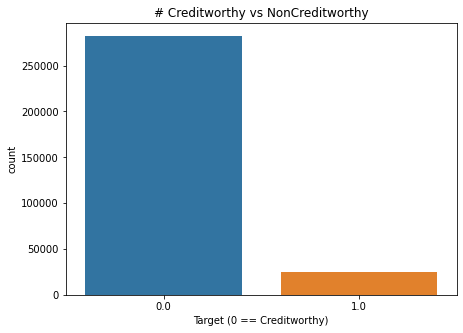

In [39]:
f, ax = plt.subplots(figsize = (7, 5))
sns.countplot(x = 'TARGET', data = app_train_full)
_ = plt.title('# Creditworthy vs NonCreditworthy')
_ = plt.xlabel('Target (0 == Creditworthy)')

In [40]:
base_line_accuracy = 1-np.sum(app_train_full.TARGET)/app_train_full.shape[0]
base_line_accuracy

0.9192630688106243

In [41]:
target_count_0, target_count_1 = app_train_full['TARGET'].value_counts()
target_0 = app_train_full[app_train_full['TARGET'] == 0]
target_1 = app_train_full[app_train_full['TARGET'] == 1]
print('target 0:', target_0.shape)
print('target 1:', target_1.shape)

target 0: (282416, 57)
target 1: (24804, 57)


total target of 1 and 0:
 1.0    282416
0.0    282416
Name: TARGET, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

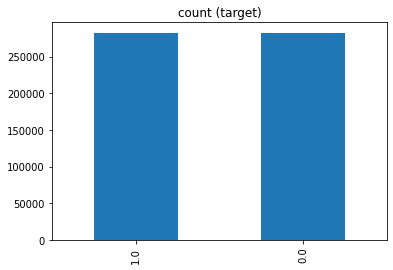

In [42]:
target_1_over = target_1.sample(target_count_0, replace = True)
train_over = pd.concat([target_1_over, target_0], axis = 0)
print("total target of 1 and 0:\n",train_over['TARGET'].value_counts())
train_over['TARGET'].value_counts().plot(kind='bar', title='count (target)')

In [43]:
train_over_shuffled = train_over.sample(frac=1)

In [44]:
train_over_shuffled

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
165313,1.0,0.0,0.0,0.0,0.0,0.000000,0.001704,0.148584,0.110074,0.102132,0.285714,0.00,0.00,0.2,0.013653,0.796843,0.042213,0.928948,0.473947,1.0,0.0,1.0,1.0,0.0,0.000000,0.5,0.5,1.000000,0.260870,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.724604,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
221825,0.0,0.0,0.0,0.0,1.0,0.052632,0.002858,0.157303,0.079133,0.158249,0.000000,0.00,0.25,0.0,0.141377,0.562345,0.033133,0.687338,0.407670,1.0,0.0,1.0,0.0,0.0,0.105263,1.0,1.0,0.000000,0.739130,0.0,0.0,0.0,0.0,0.0,0.0,0.596491,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101612,0.0,0.0,0.0,0.0,0.0,0.000000,0.000742,0.056180,0.049333,0.057239,0.000000,0.00,0.00,0.0,0.361433,0.781003,0.045115,0.778534,0.443518,1.0,0.0,1.0,0.0,0.0,0.000000,0.5,0.5,1.000000,0.739130,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.841566,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25004,1.0,0.0,0.5,0.0,0.0,0.000000,0.000742,0.052360,0.060583,0.046016,0.000000,0.00,0.25,0.0,0.118752,0.373901,0.022043,0.571944,0.703349,1.0,0.0,1.0,0.0,0.0,0.052632,0.5,0.5,0.166667,0.521739,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.899348,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24737,1.0,0.0,0.5,0.0,0.0,0.000000,0.001320,0.113715,0.100070,0.097643,0.000000,0.00,0.00,0.0,0.282797,0.826494,0.045689,0.957725,0.693622,1.0,0.0,1.0,0.0,0.0,0.000000,1.0,0.5,0.333333,0.521739,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.862069,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69189,0.0,0.0,0.0,0.0,0.0,0.000000,0.003243,0.351073,0.227238,0.327722,0.000000,0.25,0.25,0.0,0.260475,0.255242,0.013911,0.935636,0.420731,1.0,0.0,1.0,0.0,0.0,0.052632,0.5,0.5,1.000000,0.695652,0.0,0.0,0.0,0.0,1.0,1.0,0.035088,0.517008,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
182622,0.0,1.0,0.0,0.0,0.0,0.105263,0.000742,0.022472,0.020025,0.023569,0.000000,0.50,0.25,0.0,0.344429,0.822492,0.046148,0.943418,0.577463,1.0,0.0,1.0,0.0,0.0,0.157895,0.5,0.5,0.833333,0.521739,0.0,0.0,0.0,1.0,1.0,0.0,0.000000,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
53019,0.0,0.0,0.0,0.0,1.0,0.000000,0.001704,0.050606,0.082801,0.047138,0.000000,0.00,1.00,0.0,0.109945,0.727959,0.045376,0.889754,0.357232,1.0,1.0,1.0,0.0,0.0,0.000000,0.5,0.5,0.166667,0.391304,0.0,1.0,1.0,0.0,1.0,1.0,0.192982,0.962022,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71373,1.0,0.0,0.0,1.0,1.0,0.000000,0.001704,0.310449,0.156300,0.270483,0.000000,0.00,0.25,0.0,0.392880,0.725930,0.040913,0.987962,0.443518,1.0,1.0,1.0,1.0,0.0,0.052632,0.5,0.5,1.000000,0.608696,0.0,1.0,1.0,0.0,1.0,1.0,0.000000,0

In [45]:
X = train_over_shuffled.drop(columns = 'TARGET', axis = 1)
y = train_over_shuffled.TARGET.values
np.random.seed(42)
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X, y)

In [46]:
X_train_over

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
99929,0.0,0.5,0.0,0.0,0.000000,0.000935,0.121924,0.119884,0.090909,0.285714,0.00,0.25,0.0,0.158035,0.809301,0.044588,0.958171,0.839794,1.0,0.0,1.0,0.0,1.0,0.052632,0.5,0.5,0.666667,0.565217,0.0,0.0,0.0,0.0,0.0,0.0,0.157895,0.883970,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40679,0.0,0.5,0.0,0.0,0.052632,0.000742,0.083779,0.074710,0.071829,0.000000,0.00,0.25,0.4,0.635991,0.808512,0.043382,0.781534,0.574962,1.0,0.0,1.0,0.0,0.0,0.105263,0.0,0.0,1.000000,0.608696,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.885834,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
218142,0.0,0.5,0.0,1.0,0.000000,0.000165,0.026921,0.033521,0.023569,0.428571,0.75,0.00,0.0,0.361433,0.061443,1.000000,0.391132,0.412255,0.0,0.0,1.0,1.0,0.0,0.000000,0.5,0.5,1.000000,0.434783,0.0,0.0,0.0,0.0,0.0,0.0,0.087719,0.999767,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
247219,0.0,0.5,0.0,0.0,0.000000,0.000742,0.029146,0.021990,0.023569,0.428571,0.00,0.75,0.6,0.268617,0.151691,1.000000,0.501500,0.453244,0.0,0.0,1.0,1.0,0.0,0.000000,0.5,0.5,1.000000,0.391304,0.0,0.0,0.0,0.0,0.0,0.0,0.087719,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110757,0.0,0.5,0.0,0.0,0.052632,0.002781,0.364998,0.187908,0.326599,0.285714,0.25,0.00,0.0,0.090864,0.720293,0.036458,0.989583,0.934695,1.0,0.0,1.0,0.0,1.0,0.052632,1.0,1.0,0.000000,0.347826,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.731128,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39698,0.0,0.5,0.0,0.0,0.000000,0.000473,0.087683,0.073201,0.075196,0.428571,0.00,0.25,0.0,0.276330,0.197407,1.000000,0.499554,0.386411,0.0,0.0,1.0,0.0,0.0,0.052632,1.0,1.0,0.500000,0.434783,0.0,0.0,0.0,0.0,0.0,0.0,0.087719,0.888630,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28797,0.0,0.5,0.0,1.0,0.052632,0.000742,0.020135,0.027343,0.012346,0.142857,0.00,0.25,0.0,0.129705,0.356933,0.046391,0.617502,0.660831,1.0,0.0,1.0,0.0,0.0,0.105263,0.5,0.5,1.000000,0.434783,0.0,0.0,0.0,0.0,1.0,1.0,0.122807,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99836,0.0,0.0,0.0,0.0,0.157895,0.000858,0.026921,0.064935,0.023569,0.000000,0.00,0.25,0.0,0.083165,0.757328,0.038042,0.877594,0.902876,1.0,0.0,1.0,0.0,0.0,0.210526,1.0,1.0,0.166667,0.652174,0.0,0.0,0.0,0.0,1.0,1.0,0.070175,0.907269,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
120255,0.0,0.0,0.0,0.0,0.000000,0.001704,0.148946,0.086118,0.123457,0.000000,0.00,0.50,0.0,0.429796,0.324183,0.039091,0.775373,0.578158,1.0,0.0,1.0,0.0,0.0,0.052632,0.5,0.5,0.666667,0.347826,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.773998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [47]:
X_test_over

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
87665,0.0,0.5,0.0,1.0,0.157895,0.000550,0.257978,0.116637,0.214366,0.000000,0.00,0.25,0.0,0.311695,0.670293,0.041430,0.738043,0.871474,1.0,0.0,1.0,1.0,0.0,0.210526,0.5,0.5,0.166667,0.652174,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.657269,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24400,0.0,0.5,0.0,0.0,0.000000,0.000473,0.101124,0.060372,0.102132,0.000000,0.00,0.25,0.0,0.344429,0.322661,0.021323,0.866002,0.577324,1.0,0.0,1.0,0.0,0.0,0.052632,0.5,0.5,0.000000,0.695652,0.0,0.0,0.0,0.0,0.0,0.0,0.140351,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
215284,0.0,0.5,0.0,0.0,0.000000,0.000742,0.031371,0.031362,0.023569,0.428571,0.50,0.25,0.0,0.142153,0.110485,1.000000,0.978032,0.927609,0.0,0.0,1.0,0.0,0.0,0.052632,1.0,1.0,0.833333,0.434783,0.0,0.0,0.0,0.0,0.0,0.0,0.087719,0.931500,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57635,0.0,0.5,0.0,1.0,0.000000,0.000550,0.079708,0.086048,0.074074,0.428571,0.00,0.75,0.0,0.065247,0.016460,1.000000,0.623703,0.339725,0.0,0.0,1.0,1.0,0.0,0.000000,1.0,1.0,0.333333,0.652174,0.0,0.0,0.0,0.0,0.0,0.0,0.087719,0.998835,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
206033,0.0,0.5,0.0,0.0,0.000000,0.001127,0.044944,0.027290,0.046016,0.428571,0.00,0.75,0.0,0.361433,0.134780,1.000000,0.470655,0.445185,0.0,0.0,1.0,1.0,0.0,0.000000,0.5,0.5,0.166667,0.434783,0.0,0.0,0.0,0.0,0.0,0.0,0.087719,0.656570,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64821,0.0,0.5,0.0,0.0,0.000000,0.001320,0.266040,0.170604,0.244669,0.000000,0.50,0.25,0.0,0.336758,0.901860,0.042466,0.837670,0.971655,1.0,0.0,1.0,0.0,0.0,0.052632,0.5,0.5,0.000000,0.739130,0.0,0.0,0.0,0.0,0.0,0.0,0.403509,0.943150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68688,0.0,0.5,1.0,1.0,0.000000,0.002012,0.146067,0.187820,0.147026,0.000000,0.00,0.25,0.6,0.048852,0.900789,0.046308,0.842899,0.985966,1.0,0.0,1.0,0.0,0.0,0.052632,0.5,0.5,0.500000,0.521739,0.0,0.0,0.0,0.0,1.0,1.0,0.175439,0.873253,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
231867,0.0,0.5,1.0,0.0,0.052632,0.000742,0.118049,0.092418,0.096521,0.000000,0.00,0.00,0.0,0.268617,0.764769,0.045172,0.925057,0.523551,1.0,0.0,1.0,0.0,0.0,0.052632,0.5,0.5,0.000000,0.434783,0.0,0.0,0.0,0.0,0.0,0.0,0.157895,0.995340,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199782,0.0,0.0,0.0,1.0,0.052632,0.000935,0.044944,0.097841,0.046016,0.285714,0.25,0.25,0.0,0.024260,0.806370,0.043014,0.942729,0.633319,1.0,0.0,1.0,0.0,0.0,0.105263,1.0,1.0,0.500000,0.782609,0.0,0.0,0.0,0.0,1.0,1.0,0.000000,0.814539,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0

In [48]:
y_train_over

array([0., 1., 1., ..., 0., 1., 0.])

In [49]:
y_test_over

array([1., 0., 0., ..., 1., 1., 1.])

In [50]:
import os
X_train_over.to_csv(os.path.join(PATH, "X_train_over.csv"))
X_test_over.to_csv(os.path.join(PATH, "X_test_over.csv"))

In [51]:
np.savetxt(os.path.join(PATH, "y_train_over.csv"), y_train_over, delimiter=",")
np.savetxt(os.path.join(PATH, "y_test_over.csv"), y_test_over, delimiter=",")

In [52]:
X_train_over = pd.read_csv(PATH + 'X_train_over.csv', index_col=0)
X_test_over = pd.read_csv(PATH + 'X_test_over.csv', index_col=0)
y_train_over = pd.read_csv(PATH + 'y_train_over.csv', header = None)
y_test_over = pd.read_csv(PATH + 'y_test_over.csv', header=None)

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix
lr = LogisticRegression()
lr.fit(X_train_over, y_train_over)

/home/pl/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/pl/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
y_test_hat = lr.predict(X_test_over)
y_test_hat_probs = lr.predict_proba(X_test_over)[:, 1]
test_accuracy = accuracy_score(y_test_over, y_test_hat)*100
test_auc_roc = roc_auc_score(y_test_over, y_test_hat_probs)*100
print(confusion_matrix(y_test_over, y_test_hat))
print(test_auc_roc, "%")
print(test_accuracy, "%")

[[43709 26705]
 [26597 44197]]
66.65137342656779 %
62.25284686420033 %


In [55]:
print (classification_report ( y_test_over ,  y_test_hat ,  digits = 6 ))

              precision    recall  f1-score   support

         0.0   0.621697  0.620743  0.621219     70414
         1.0   0.623353  0.624304  0.623828     70794

    accuracy                       0.622528    141208
   macro avg   0.622525  0.622524  0.622524    141208
weighted avg   0.622527  0.622528  0.622527    141208



In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rf = RandomForestClassifier()
rf.fit(X_train_over, y_train_over)

/tmp/ipykernel_14866/1358211493.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_over, y_train_over)


RandomForestClassifier()

In [58]:
y_test_hat = rf.predict(X_test_over)
y_test_hat_probs = rf.predict_proba(X_test_over)[:, 1]
test_accuracy = accuracy_score(y_test_over, y_test_hat)*100
test_auc_roc = roc_auc_score(y_test_over, y_test_hat_probs)*100
print(confusion_matrix(y_test_over, y_test_hat))
print(test_auc_roc, "%")
print(test_accuracy, "%")

[[70315    99]
 [   10 70784]]
99.99484778869434 %
99.922808906011 %


In [59]:
print ( classification_report ( y_test_over ,  y_test_hat ,  digits = 6 ))

              precision    recall  f1-score   support

         0.0   0.999858  0.998594  0.999226     70414
         1.0   0.998603  0.999859  0.999231     70794

    accuracy                       0.999228    141208
   macro avg   0.999231  0.999226  0.999228    141208
weighted avg   0.999229  0.999228  0.999228    141208



In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train_over, y_train_over)

In [ ]:
y_test_hat = dt.predict(X_test_over)
y_test_hat_probs = dt.predict_proba(X_test_over)[:, 1]
test_accuracy = accuracy_score(y_test_over, y_test_hat)*100
test_auc_roc = roc_auc_score(y_test_over, y_test_hat_probs)*100
print(confusion_matrix(y_test_over, y_test_hat))
print(test_auc_roc, "%")
print(test_accuracy, "%")

In [ ]:
print ( classification_report ( y_test_over ,  y_test_hat ,  digits = 6 ))

In [ ]:
from sklearn import svm

In [ ]:
#clf = svm.SVC(kernel='linear', C=1).fit(X_train_over, y_train_over)

In [ ]:
#svc = SVC(probability=True)


In [ ]:
#svc.fit(X_train_over, y_train_over)

In [ ]:
#y_test_hat = svc.predict(X_test_over)
#y_test_hat_probs = svc.predict_proba(X_test_over)[:, 1]
#test_accuracy = accuracy_score(y_test_over, y_test_hat)*100
#test_auc_roc = roc_auc_score(y_test_over, y_test_hat_probs)*100
#print(confusion_matrix(y_test_over, y_test_hat))
#print(test_auc_roc, "%")
#print(test_accuracy, "%")

In [ ]:
#print ( classification_report ( y_test_over ,  y_test_hat ,  digits = 6 ))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train_over, y_train_over)

In [ ]:
y_test_hat = gb.predict(X_test_over)
y_test_hat_probs = gb.predict_proba(X_test_over)[:, 1]
test_accuracy = accuracy_score(y_test_over, y_test_hat)*100
test_auc_roc = roc_auc_score(y_test_over, y_test_hat_probs)*100
print(confusion_matrix(y_test_over, y_test_hat))
print(test_auc_roc, "%")
print(test_accuracy, "%")

In [ ]:
print ( classification_report ( y_test_over ,  y_test_hat ,  digits = 6 ))